In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import numpy as np
import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
bag_df = pd.read_csv('bag_words.csv', sep=';')

In [3]:
bag_df.columns = ['', 'link', 'categoria', 'texto']

In [4]:
bag_df.head()

,,link,categoria,texto
0,0,http://g1.globo.com/sp/sao-carlos-regiao/notic...,agro,fundo defesa citricultura fundecitrus araraqua...
1,1,http://g1.globo.com/sp/piracicaba-regiao/notic...,agro,universidade paulo usp piracicabasp anunciou i...
2,2,http://g1.globo.com/economia/agronegocios/noti...,agro,exportações carne bovina brasil deverão cresce...
3,3,http://g1.globo.com/economia/midia-e-marketing...,agro,mcdonalds saladas compostas vegetais orgânicos...
4,4,http://g1.globo.com/sp/sao-carlos-regiao/notic...,agro,utilizando substâncias homeopáticas pesquisado...


In [5]:
bag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 4 columns):
             702 non-null int64
link         702 non-null object
categoria    702 non-null object
texto        428 non-null object
dtypes: int64(1), object(3)
memory usage: 22.0+ KB


In [6]:
bag_df.describe()

,
count,702.000000
mean,350.500000
std,202.794231
min,0.000000
25%,175.250000
50%,350.500000
75%,525.750000
max,701.000000


In [7]:
bag_df_clean = bag_df.dropna()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    bag_df_clean.texto, bag_df_clean.categoria
)

In [8]:
def do_forest(n_estimators, accuracy):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    forest = RandomForestClassifier(n_estimators=n_estimators) 
    pipe = Pipeline([('vect', vectorizer), ('forest', forest)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
accuracy = []

for n in range(1,150):
    do_forest(n, accuracy)

Text(0,0.5,'Testing Accuracy')

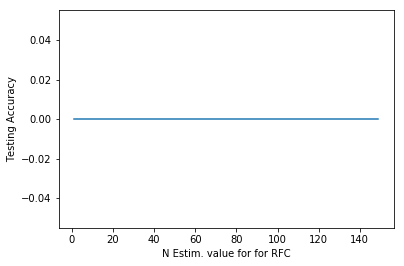

In [10]:
plt.plot(range(1, 150), accuracy)
plt.xlabel('N Estim. value for for RFC')
plt.ylabel('Testing Accuracy')

In [11]:
url = 'http://g1.globo.com/rs/rio-grande-do-sul/noticia/2017/01/nas-proximas-horas-ou-dias-teremos-novo-relator-da-lava-jato-diz-mello.html'
def predict(url):
    from news_categorizer import pre_processor
    words = pre_processor(url)
    resp = pipe.predict([words])
    print resp
    probs = pipe.predict_proba([words])
    resp = zip(pipe.classes_, probs[0])
    resp.sort(key=lambda tup: tup[1], reverse=True)
    print resp
    
#predict(url)

In [13]:
# Running LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(321,) (107,) (321,) (107,)


In [14]:
logreg = LogisticRegression()
vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
pipe = Pipeline([('vect', vect), ('logreg', logreg)])

pipe.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [ ]:
Y_pred = pipe.predict(X_test)
print metrics.accuracy_score(Y_test,Y_pred)

In [ ]:
# Running KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def do_knn(n_neighbors, accuracy):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('knn', knn)])

    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    accuracy.append(acc)

In [ ]:
accuracy = []
for n in range(1, 100):
    do_knn(n, accuracy)

In [ ]:
plt.plot(range(1, 100), accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# Running Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

def do_nb():
    model = MultinomialNB()
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('nb', model)])

    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    print acc

do_nb()

In [ ]:
# Running SVC

In [ ]:
from sklearn.svm import SVC

def do_svc(**kwargs):
    model = SVC(**kwargs)
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('svc', model)])
    
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    print acc

In [ ]:
do_svc()

In [ ]:
do_svc(kernel='linear', C=1.0)

In [ ]:
do_svc(kernel='rbf', gamma=0.7, C=1.0)

In [ ]:
do_svc(kernel='poly', degree=3, C=1.0)

In [ ]:
do_svc(C=1.0)

In [ ]:

import time
import sys
import numpy as np


class SentimentNetwork:

    def __init__(self, reviews, labels, hidden_nodes=10, learning_rate=0.1):
        """Create a SentimenNetwork with the given settings
        Args:
            reviews(list) - List of reviews used for training
            labels(list) - List of POSITIVE/NEGATIVE labels associated with the given reviews
            hidden_nodes(int) - Number of nodes to create in the hidden layer
            learning_rate(float) - Learning rate to use while training
        
        """
        np.random.seed(1)
        self.pre_process_data(reviews, labels)
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)

    def pre_process_data(self, reviews, labels):
        review_vocab = set([word for rev in reviews for word in rev.split(' ')])
        self.review_vocab = list(review_vocab)
        
        label_vocab = set([label for label in labels])
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i

    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        self.learning_rate = learning_rate

        self.weights_0_1 = np.zeros((self.input_nodes, self.hidden_nodes))

        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                           (self.hidden_nodes, self.output_nodes))

        self.layer_1 = np.zeros((1, hidden_nodes))

    def get_target_for_label(self, label):
        if label == "agro":
            return 1
        return 0

    def sigmoid(self, x):
        return 1. / (1. + np.exp(-x))

    def sigmoid_output_2_derivative(self, output):
        return output * (1 - output)

    def train(self, training_reviews_raw, training_labels):
        training_reviews = list()
        for review in training_reviews_raw:
            indices = set()
            for word in review.split(" "):
                if(word in self.word2index.keys()):
                    indices.add(self.word2index[word])
            training_reviews.append(list(indices))

        assert(len(training_reviews) == len(training_labels))

        correct_so_far = 0
        start = time.time()

        for i in range(len(training_reviews)):
            review = training_reviews[i]
            label = training_labels[i]

            self.layer_1 *= 0
            for index in review:
                self.layer_1 += (self.weights_0_1[index])

            layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error

            self.weights_1_2 -= self.layer_1.T.dot(layer_2_delta) * self.learning_rate
            
            for index in review:
                self.weights_0_1[index] -= layer_1_delta[0] * self.learning_rate

            # Keep track of correct predictions.
            if(layer_2 >= 0.5 and label == 'agro'):
                correct_so_far += 1
            elif(layer_2 < 0.5 and label == 'ciencia'):
                correct_so_far += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0

            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) \
                             + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")

    def test(self, testing_reviews, testing_labels):
        """
        Attempts to predict the labels for the given testing_reviews,
        and uses the test_labels to calculate the accuracy of those predictions.
        """
        correct = 0
        start = time.time()

        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1

            elapsed_time = float(time.time() - start)
            reviews_per_second = i / elapsed_time if elapsed_time > 0 else 0
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                             + " #Correct:" + str(correct) + " #Tested:" + str(i+1) \
                             + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")

    def run(self, review):
        """
        Returns a POSITIVE or NEGATIVE prediction for the given review.
        """
        self.layer_1 *= 0
        unique_indices = set()
        for word in review.lower().split(" "):
            if word in self.word2index.keys():
                unique_indices.add(self.word2index[word])
        for index in unique_indices:
            self.layer_1 += self.weights_0_1[index]

        layer_2 = self.sigmoid(self.layer_1.dot(self.weights_1_2))

        if layer_2 >= 0.5:
            return 'agro'
        return 'ciencia'


In [ ]:
bag_df = pd.read_csv('bag_words.csv', sep=';', index_col=0)
#bag_df.columns = ['link', 'categoria', 'texto']

In [ ]:
sample = bag_df[0:149].copy()

In [ ]:
sample.info()

In [ ]:
sample.columns = ['link', 'categoria', 'texto']
sample = sample.dropna()

In [ ]:
train_text = list(sample.texto[1:150])

In [ ]:
train_categ = list(sample.categoria[1:150])

In [ ]:
test_text = list(sample.texto[121:150])

In [ ]:
test_categ = list(sample.categoria[121:150])

In [56]:
mlp = SentimentNetwork(train_text, train_categ, learning_rate=0.001)

In [57]:
mlp.train(train_text, train_categ)

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%


Progress:99.3% Speed(reviews/sec):619.5 #Correct:62 #Trained:146 Training Accuracy:42.4%

In [58]:
mlp.test(train_text, train_categ)

Progress:99.3% Speed(reviews/sec):15.16 #Correct:30 #Tested:146 Testing Accuracy:20.5%